## **Task 2**

CAR PRICE PREDICTION WITH MACHINE LEARNING
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.
DOWNLOAD DATASET FROM HERE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
car_data = pd.read_csv('/content/raw.githubusercontent.com_amankharwal_Website-data_master_CarPrice.csv')

car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
car_data.info()

In [ ]:
# Drop unnecessary columns
car_data = car_data.drop(['car_ID', 'symboling', 'CarName'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
car_data = pd.get_dummies(car_data)



In [ ]:
# Split the data into features (X) and target variable (y)
X = car_data.drop('price', axis=1)
y = car_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MODEL LINEAR REGRESSION**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 3164.820845725236


In [ ]:
car_data['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
print( f"Skewness: {car_data['price'].skew()}")

Skewness: 1.7776781560914454


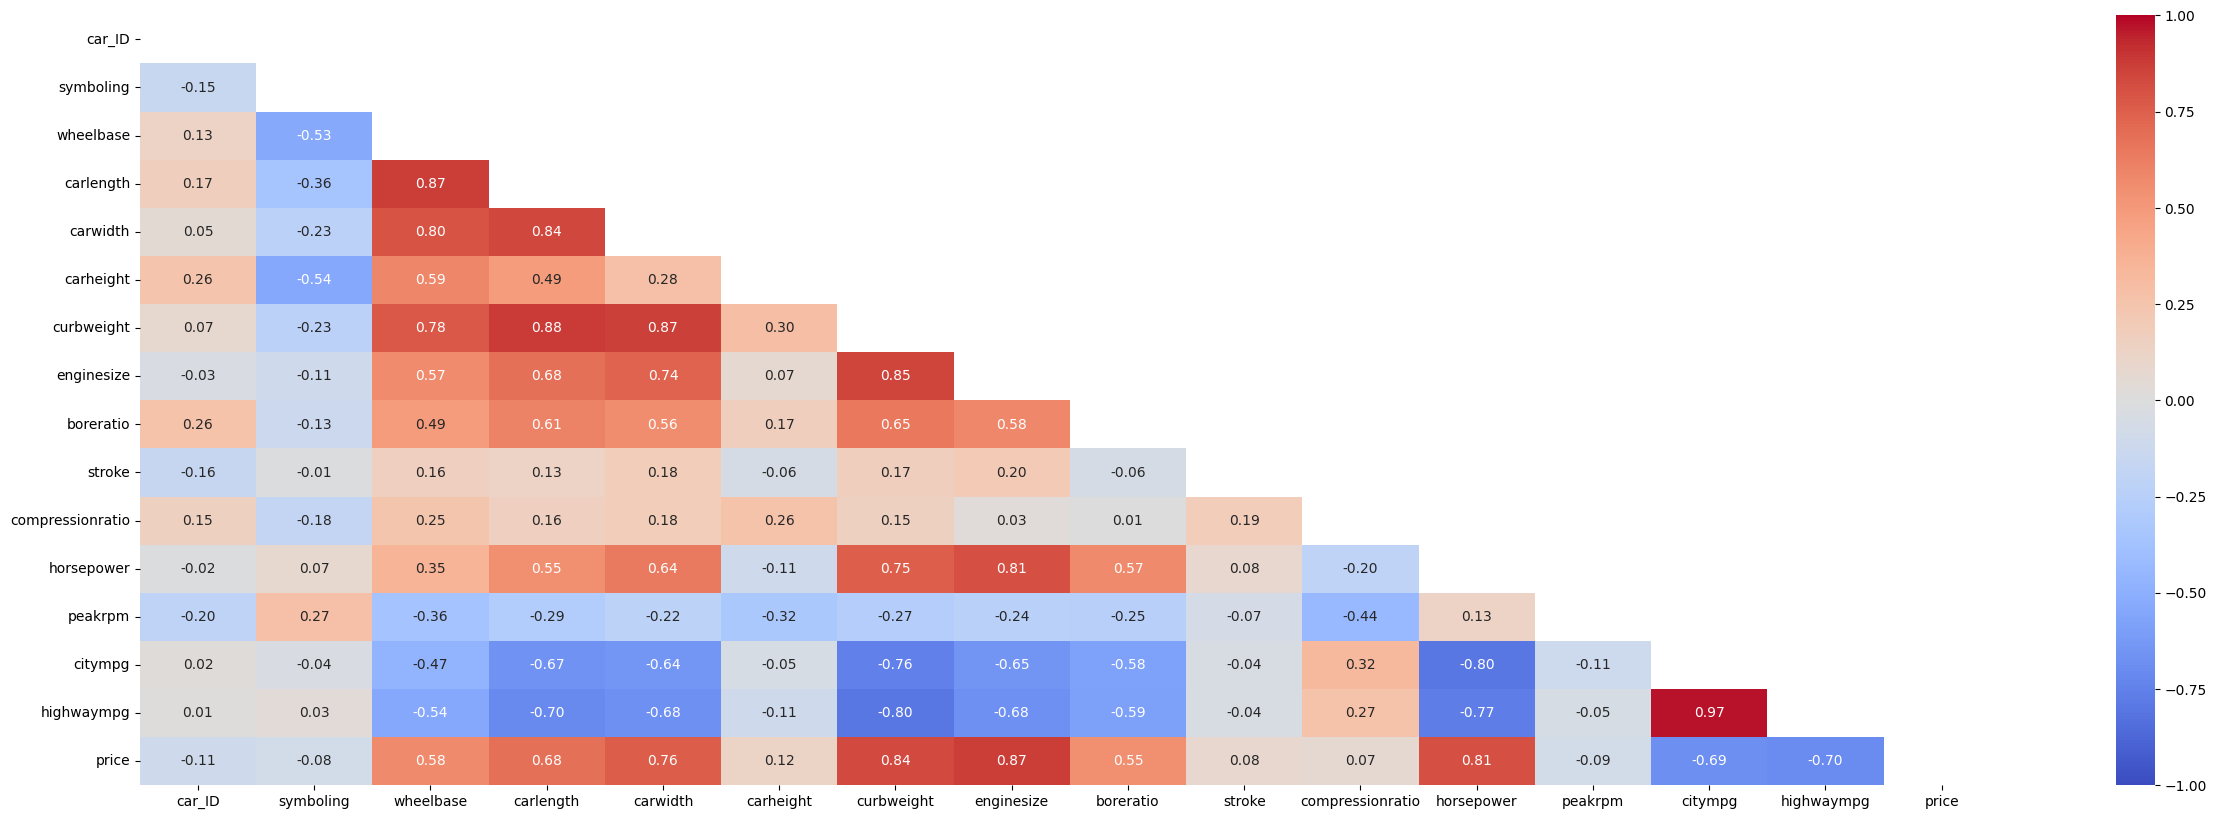

In [ ]:
import numpy as np

numerical1= car_data.select_dtypes('number').columns


matrix = np.triu(car_data[numerical1].corr())
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap (car_data[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

**Model & Price**

In [ ]:

mean_prices_by_model = car_data.groupby('CarName')['price'].mean().sort_values()

print(mean_prices_by_model)




CarName
chevrolet impala                    5151.0
maxda rx3                           5195.0
toyota corona mark ii               5348.0
mitsubishi mirage                   5389.0
Nissan versa                        5499.0
                                    ...   
jaguar xk                          36000.0
porsche boxter                     37028.0
buick century special              40960.0
bmw x5                             41315.0
buick regal sport coupe (turbo)    45400.0
Name: price, Length: 147, dtype: float64


In [ ]:

mean_prices_by_fuelsystem = car_data.groupby('fuelsystem')['price'].mean().sort_values()

print(mean_prices_by_fuelsystem)



fuelsystem
2bbl     7478.151515
1bbl     7555.545455
spdi    10990.444444
spfi    11048.000000
4bbl    12145.000000
mfi     12964.000000
idi     15838.150000
mpfi    17754.602840
Name: price, dtype: float64


Engine type & Price

In [ ]:
mean_prices_by_enginetype = car_data.groupby('enginetype')['price'].mean().sort_values()

print(mean_prices_by_enginetypel)




enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64


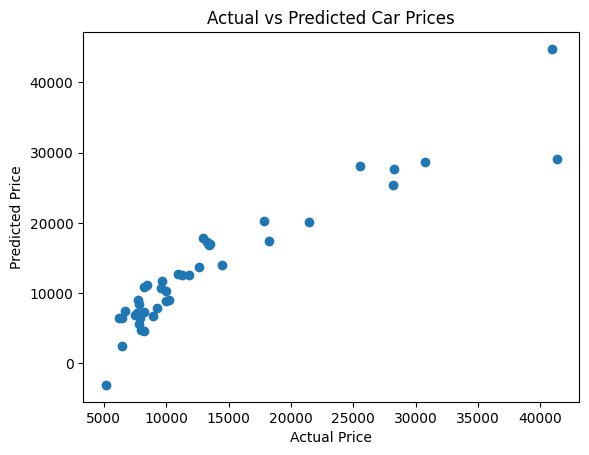

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted prices against the actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()
